In [1]:
import pandas as pd
%pylab inline

df = pd.read_csv('data/MMI_gender_prediction.csv', index_col = 0)
df.head()


Populating the interactive namespace from numpy and matplotlib


,chrX_mean_depth,pred_gender,gender,consistent
MMI001,19.322773,M,M,True
MMI002,37.040048,F,F,True
MMI003,23.854752,M,M,True
MMI004,46.977884,F,F,True
MMI005,30.219566,F,F,True


In [2]:
data_map = {}

for subject in df.index:
    sex = df.loc[subject, 'gender']
    res = ! python3 low_coverage_analysis.py --id {subject} --out out/{subject} --sex {sex}
    print(res[-1])
    data_map[subject] = [int(item) for item in res[-1].split()]
    

3 10 0
6 15 2
0 4 0
6 10 2
17 28 5
6 18 2
0 13 0
1 14 0
0 21 1
0 12 1
7 18 2
3 15 3
1 11 0
0 10 0
1 15 1
1 19 0
6 18 2
7 13 4
6 12 2
0 8 0
1 14 0
0 8 1
1 18 1
8 16 0
1 18 1
7 18 1
5 15 1
1 18 0
1 13 1
0 13 0
1 15 0
1 15 0
1 21 1
0 7 0
0 11 0
6 12 2
1 12 0
5 15 1
0 8 0
7 13 0
4 16 0
1 8 0
11 13 3
0 15 0
42 41 14
12 31 4
8 15 0
12 33 2


In [3]:
df = pd.read_csv('data/WES_gender_prediction.csv', index_col = 0)
df.head()

,mean depth,length,gender
wes001,41.197802,91,M
wes002,72.318681,91,F
wes003,43.824176,91,F
wes004,132.021978,91,F
wes005,24.472527,91,M


In [5]:
from glob import glob

vcf_del = glob('/home/dna/webb/low_coverage_test/whole_exon_out/*/vcf_scan/report_vcf_del.txt')

In [6]:
for vd, subject in zip(vcf_del, df.index):
    sex = df.loc[subject, 'gender']
    res = ! python3 low_coverage_analysis.py --id {subject} --out out/{subject} --sex {sex} --vd {vd}
    print(res[-1])
    data_map[subject] = [int(item) for item in res[-1].split()]

4 68 4
11 68 4
8 69 5
7 66 3
9 71 6
4 69 4
16 73 4
9 69 7
6 67 4
11 69 4
31 80 8


In [7]:
new_keys = [f'MMI{i:03}' for i in range(1,49) if i not in [5,45,46,47,48]]
new_keys += [f'MMI{i:03}' for i in [5,45,46,47,48]]
new_keys.remove('MMI007')
new_keys.remove('MMI036')
new_keys += [f'wes{i:03}' for i in range(1,12)]

draft_keys = [f'wgs40x{i:02}' for i in range(1,42)] + [f'wgs30x{i:02}' for i in range(1,6)] + [f'wes{i:02}' for i in range(1,12)]
draft_keys[-5:]

['wes07', 'wes08', 'wes09', 'wes10', 'wes11']

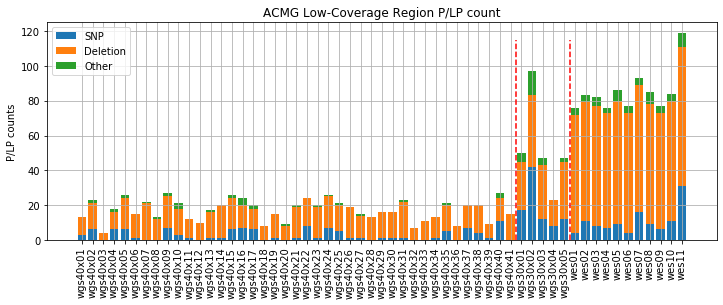

In [8]:
single_cnts1 = [data_map[k][0] for k in new_keys]
del_cnts1 = np.array([data_map[k][1] for k in new_keys])
other_cnts1 = np.array([data_map[k][2] for k in new_keys])

plt.figure(figsize(12,4))
plt.title('ACMG Low-Coverage Region P/LP count')
plt.bar(draft_keys, single_cnts1, label='SNP')
plt.bar(draft_keys, del_cnts1, bottom=single_cnts1, label='Deletion')
plt.bar(draft_keys, other_cnts1, bottom=single_cnts1+del_cnts1, label='Other')
plt.vlines(40.5,0,115,'r',linestyles='dashed')
plt.vlines(45.5,0,115,'r',linestyles='dashed')
plt.xticks(rotation=90)
plt.ylabel('P/LP counts')
plt.legend()
plt.grid()
plt.savefig('ACMG_PLP_cnt.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
def count_exon(annotate_exon_file):
    internal_cnt, external_cnt = 0, 0
    with open(annotate_exon_file, 'r') as rh:
        for line in rh:
            tail = line.split('\t')[-1]
            if 'internal' in tail:
                internal_cnt += 1
            elif 'junction' in tail:
                external_cnt += 1
    return internal_cnt, external_cnt

In [22]:
exon_map = {}

for subject in data_map.keys():
    exon_map[subject] = count_exon(f'out/{subject}/{subject}_coverage_check_filter.txt')

In [19]:
exon_map

{'MMI001': (9, 3),
 'MMI002': (6, 4),
 'MMI003': (5, 4),
 'MMI004': (8, 3),
 'MMI005': (11, 6),
 'MMI006': (8, 4),
 'MMI007': (5, 3),
 'MMI008': (7, 7),
 'MMI009': (6, 9),
 'MMI010': (7, 5),
 'MMI011': (8, 2),
 'MMI012': (10, 6),
 'MMI013': (9, 5),
 'MMI014': (8, 2),
 'MMI015': (8, 4),
 'MMI016': (10, 2),
 'MMI017': (8, 3),
 'MMI018': (12, 8),
 'MMI019': (6, 4),
 'MMI020': (5, 4),
 'MMI021': (8, 3),
 'MMI022': (7, 3),
 'MMI023': (7, 4),
 'MMI024': (13, 6),
 'MMI025': (7, 3),
 'MMI026': (9, 10),
 'MMI027': (11, 7),
 'MMI028': (4, 6),
 'MMI029': (6, 5),
 'MMI030': (5, 4),
 'MMI031': (5, 6),
 'MMI032': (8, 7),
 'MMI033': (6, 12),
 'MMI034': (8, 8),
 'MMI035': (6, 2),
 'MMI036': (8, 5),
 'MMI037': (5, 5),
 'MMI038': (11, 3),
 'MMI039': (6, 6),
 'MMI040': (7, 1),
 'MMI041': (8, 6),
 'MMI042': (7, 3),
 'MMI043': (10, 8),
 'MMI044': (6, 5),
 'MMI045': (17, 10),
 'MMI046': (16, 17),
 'MMI047': (12, 2),
 'MMI048': (21, 21),
 'wes001': (5, 38),
 'wes002': (7, 34),
 'wes003': (8, 32),
 'wes004': 

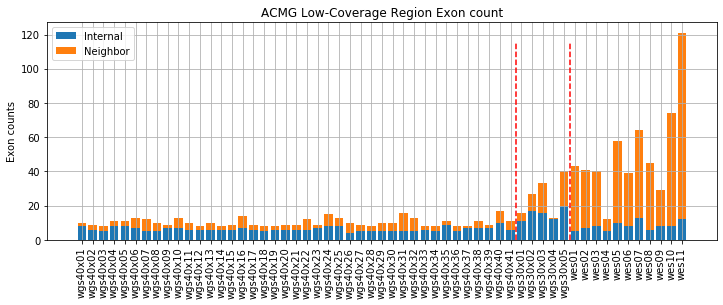

In [23]:
single_cnts1 = [exon_map[k][0] for k in new_keys]
del_cnts1 = np.array([exon_map[k][1] for k in new_keys])

plt.figure(figsize(12,4))
plt.title('ACMG Low-Coverage Region Exon count')
plt.bar(draft_keys, single_cnts1, label='Internal')
plt.bar(draft_keys, del_cnts1, bottom=single_cnts1, label='Neighbor')
plt.vlines(40.5,0,115,'r',linestyles='dashed')
plt.vlines(45.5,0,115,'r',linestyles='dashed')
plt.xticks(rotation=90)
plt.ylabel('Exon counts')
plt.legend()
plt.grid()
plt.savefig('ACMG_exon_cnt.png', dpi=300, bbox_inches='tight')
plt.show()

In [4]:
def check_chr(bam_dir, thrd=1):
    '''
    return mean depth from all acmg regions except sex chromosome
    '''
    chr_depth = {}
    depth_sum = 0
    depth_length = 0
    for i in range(1,23):
        region = f"chr{i}"
        coverage = !samtools depth -Q {thrd} -r {region} {bam_dir}
        dp_bases = [int(base.split('\t')[2]) for base in coverage]
        #input(dp_bases)
        if len(dp_bases)>0:
            base_sum = sum(dp_bases)
            base_length = len(dp_bases)
            chr_depth[region] = base_sum/base_length #len(dp_bases)
            chr_depth[f'chr{i}_length'] = base_length
            depth_sum += base_sum
            depth_length += base_length
            
        else:
            continue
            
    chr_depth['total_mean'] = depth_sum/depth_length
    return chr_depth

### Depth of ACMG

In [9]:
# Depth of ACMG
from glob import glob

acmg_bam_files = glob('out/*/*_acmg.bam')
sample_chr_depth = {}

for path in acmg_bam_files[2:]:
    idx = path.split('/')[-1][:6]
    print(idx)
    sample_chr_depth[idx] = check_chr(path)

MMI001
MMI048
MMI002
MMI003
MMI004
MMI005
MMI006
MMI007
MMI008
MMI009
MMI010
MMI011
MMI012
MMI013
MMI014
MMI015
MMI016
MMI017
MMI018
MMI019
MMI020
MMI021
MMI022
MMI023
MMI024
MMI025
MMI026
MMI027
MMI028
MMI029
MMI030
MMI031
MMI032
MMI033
MMI034
MMI035
MMI036
MMI037
MMI038
MMI039
MMI040
MMI041
MMI042
MMI043
MMI044
MMI045
MMI046
MMI047
wes001
wes002
wes003
wes004
wes005
wes006
wes007
wes008
wes009
wes010
wes011


In [11]:
wgs30x = [f'MMI{i:03}' for i in [5,45,46,47,48]]
wgs40x = [f'MMI{i:03}' for i in range(1,45) if i not in [5, 7, 36]]
wes = [f'wes{i:03}' for i in range(1,12)]

wgs30x_coverage = [sample_chr_depth[item]['total_mean'] for item in wgs30x]
wgs40x_coverage = [sample_chr_depth[item]['total_mean'] for item in wgs40x]
wes_coverage = [sample_chr_depth[item]['total_mean'] for item in wes]

In [12]:
import pandas as pd

df_coverage_total = pd.DataFrame({'Coverage':wgs40x_coverage+wgs30x_coverage+wes_coverage, 
                                  'Type':['WGS 40X']*41+['WGS 30X']*5+['WES']*11,
                                 })
df_coverage_total.shape

(57, 2)

In [13]:
coverage_all, position, method = [], [], []

for key in sample_chr_depth['MMI001'].keys():
    coverage_all += [sample_chr_depth[item][key] for item in wgs40x] + \
                    [sample_chr_depth[item][key] for item in wgs30x] + \
                    [sample_chr_depth[item][key] for item in wes]
    position += [key]*57
    method +=  ['WGS 40X']*41+['WGS 30X']*5+['WES']*11
    
df_t = pd.DataFrame({'Coverage': coverage_all,
                     'Position': position,
                     'Method': method
                    })
df_t.head()

,Coverage,Position,Method
0,38.159578,chr1,WGS 40X
1,35.398866,chr1,WGS 40X
2,44.411980,chr1,WGS 40X
3,44.178329,chr1,WGS 40X
4,32.755340,chr1,WGS 40X


Populating the interactive namespace from numpy and matplotlib


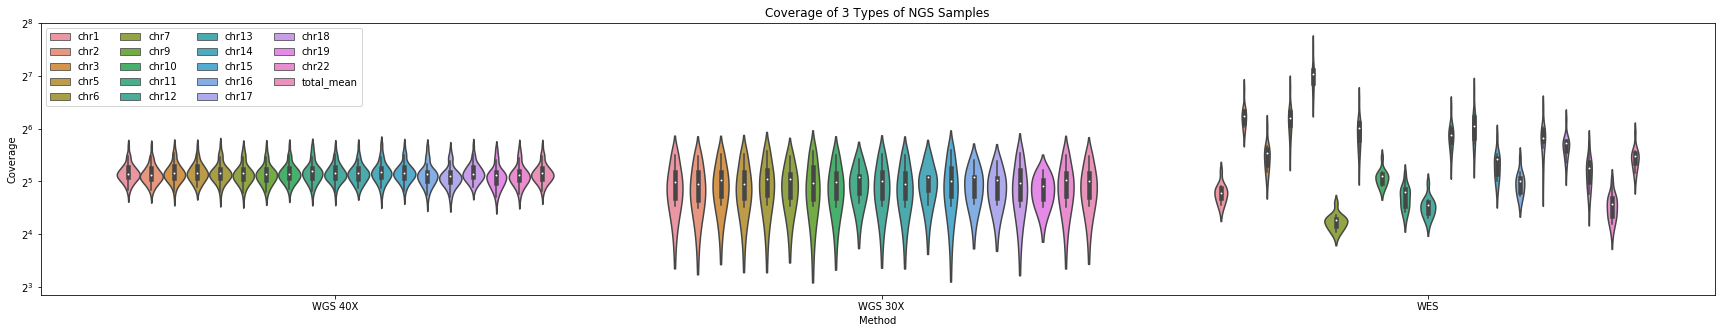

In [29]:
import seaborn as sn
%pylab inline

pos_cond = [True if '_length' not in k else False for k in df_t['Position']]

plt.figure(figsize=(30,5))
sn.violinplot(x='Method',y='Coverage',hue='Position',data=df_t[pos_cond]).set_title('Coverage of 3 Types of NGS Samples')
plt.legend(loc='upper left',ncol=4)
#plt.yscale('log')
plt.semilogy(basey=2)
#plt.hlines(10,0.5,1.5,colors='r', linestyles='dashed')
#plt.yticks([8,16,24,32,64,128,256],[8,16,24,32,64,128,256])
plt.savefig('ACMG_cov_chr.png', dpi=300, bbox_inches='tight')
plt.show()